# T1 – Arduino: Aquisição, Tratamento e Visualização de Dados de Sensor


## Sketch Arduino:

A primeira abordagem que considerei foi utilizar o Arduino para a recolha de dados utilizando o sensor de temperatura dht11:

Os componentes utilizados foram:
- Arduino UNO;
- Resistencia de 10K ohm;
- Sensor DHT11;
- BreadBoard;

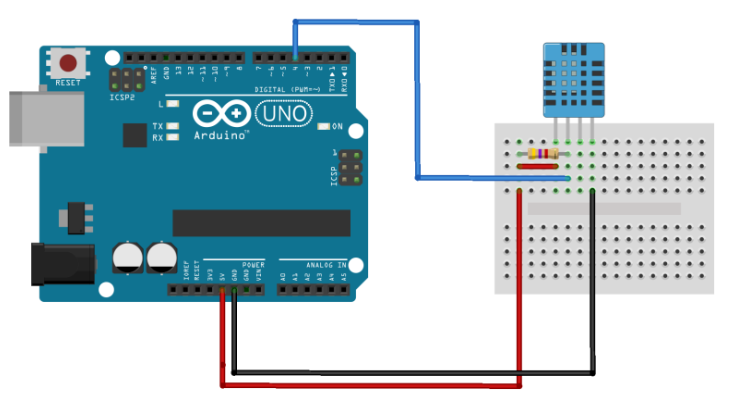

O seguinte Snipped de codigo apresenta o codigo utilizado para a recolha de de dados do sensor de temperatura.

In [ ]:
#include <dht11.h>
#define DHT11PIN 4

dht11 DHT11;

void setup()
{
  Serial.begin(9600);
}

void loop()
{
  int chk = DHT11.read(DHT11PIN);

  Serial.print(millis() / 1000); // Convert milliseconds to seconds
  Serial.print(",");
  Serial.print((float)DHT11.humidity, 2);
  Serial.print(",");
  Serial.print((float)DHT11.temperature, 2);
  Serial.println();

  delay(2000);
}


### Recolher dados do Arduino Atravez da Porta Serial.

In [21]:
import serial
import pandas as pd

# Abre a porta serial
ser = serial.Serial('COM6', 9600)

# Cria listas vazias para armazenar os dados
lista_tempo = []
lista_temperatura = []
lista_humidade = []

try:
    # Lê 250 amostras de dados do Arduino e armazena em listas
    for _ in range(250):
        linha = ser.readline().decode().strip()
        dados = linha.split(',')
        if len(dados) == 3:
            lista_tempo.append(int(dados[0]))
            lista_temperatura.append(float(dados[1]))
            lista_humidade.append(float(dados[2]))

except KeyboardInterrupt:
    print('Interrupção do teclado pelo usuário')

finally:
    # Fecha a porta serial
    ser.close()

# Cria um DataFrame a partir das listas
df = pd.DataFrame({'Tempo': lista_tempo, 'Temperatura': lista_temperatura, 'Humidade': lista_humidade})

# Salva o DataFrame em um arquivo CSV
df.to_csv('dados_sensor_raw.csv', index=False)

# Informa que o programa terminou de salvar os dados
print('Dados salvos em dados_sensor_raw.csv. Programa concluído.')


Dados salvos em dados_sensor_raw.csv. Programa concluído.


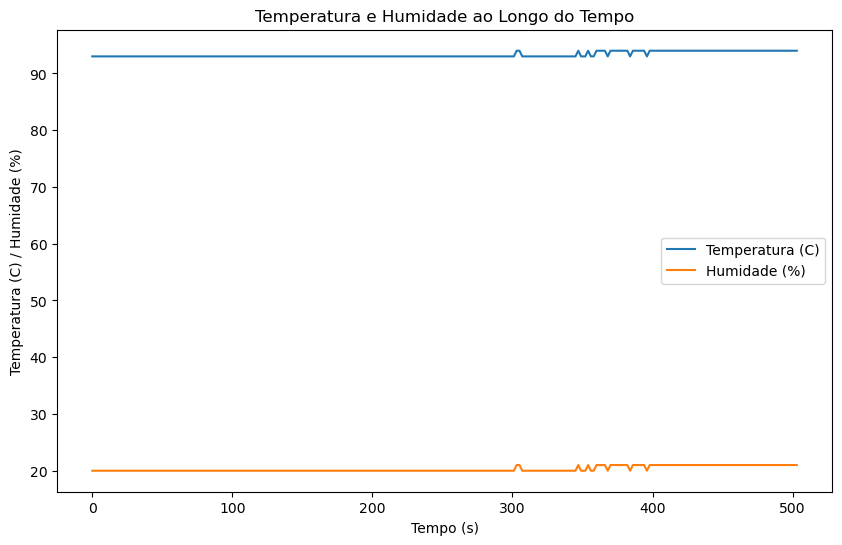

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue os dados do arquivo CSV
df = pd.read_csv('dados_sensor_raw.csv')

# Crie o gráfico
plt.figure(figsize=(10, 6))

# Adicione as curvas de temperatura e umidade ao gráfico
plt.plot(df['Tempo'], df['Temperatura'], label='Temperatura (C)')
plt.plot(df['Tempo'], df['Humidade'], label='Humidade (%)')

# Adicione rótulos aos eixos e um título ao gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (C) / Humidade (%)')
plt.title('Temperatura e Humidade ao Longo do Tempo')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()



In [23]:
import pandas as pd

# Carregue os dados do arquivo CSV
df = pd.read_csv('dados_sensor_raw.csv')

# Cálculos estatísticos
media_temperatura = df['Temperatura'].mean()
mediana_temperatura = df['Temperatura'].median()
desvio_padrao_temperatura = df['Temperatura'].std()
max_temperatura = df['Temperatura'].max()
min_temperatura = df['Temperatura'].min()

media_humidade = df['Humidade'].mean()
mediana_humidade = df['Humidade'].median()
desvio_padrao_humidade = df['Humidade'].std()
max_humidade = df['Humidade'].max()
min_humidade = df['Humidade'].min()

# Imprima os resultados
print(f'Estatísticas de Temperatura:')
print(f'Média: {media_temperatura:.2f}')
print(f'Mediana: {mediana_temperatura:.2f}')
print(f'Desvio Padrão: {desvio_padrao_temperatura:.2f}')
print(f'Máximo: {max_temperatura:.2f}')
print(f'Mínimo: {min_temperatura:.2f}')
print('\n')
print(f'Estatísticas de Humidade:')
print(f'Média: {media_humidade:.2f}')
print(f'Mediana: {mediana_humidade:.2f}')
print(f'Desvio Padrão: {desvio_padrao_humidade:.2f}')
print(f'Máximo: {max_humidade:.2f}')
print(f'Mínimo: {min_humidade:.2f}')


Estatísticas de Temperatura:
Média: 93.29
Mediana: 93.00
Desvio Padrão: 0.46
Máximo: 94.00
Mínimo: 93.00


Estatísticas de Humidade:
Média: 20.29
Mediana: 20.00
Desvio Padrão: 0.46
Máximo: 21.00
Mínimo: 20.00


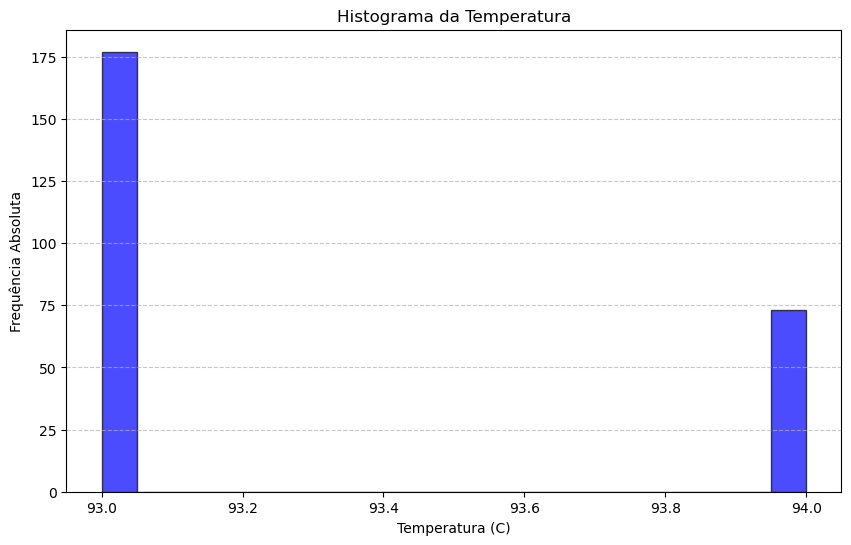

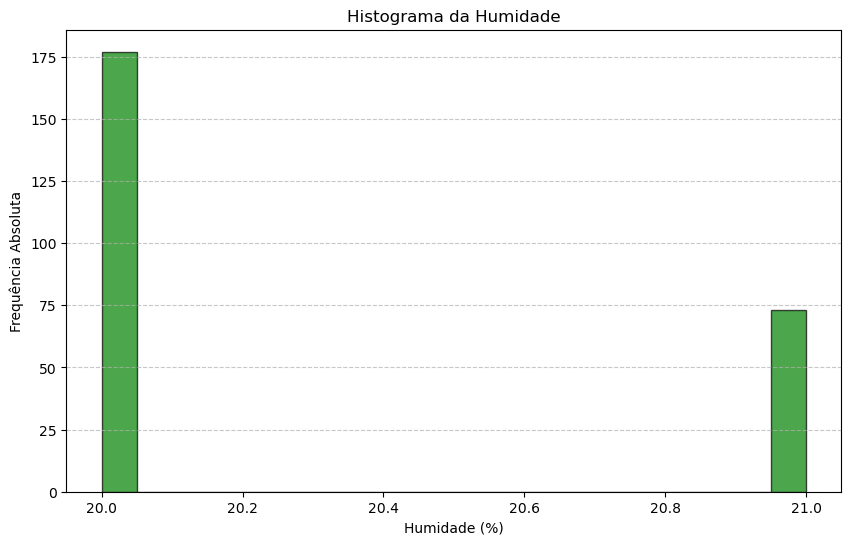

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue os dados do arquivo CSV
df = pd.read_csv('dados_sensor_raw.csv')

# Crie o histograma para a coluna 'Temperatura'
plt.figure(figsize=(10, 6))
plt.hist(df['Temperatura'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma da Temperatura')
plt.xlabel('Temperatura (C)')
plt.ylabel('Frequência Absoluta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crie o histograma para a coluna 'Humidade'
plt.figure(figsize=(10, 6))
plt.hist(df['Humidade'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histograma da Humidade')
plt.xlabel('Humidade (%)')
plt.ylabel('Frequência Absoluta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
import pandas as pd

# Carregue os dados do arquivo CSV
df = pd.read_csv('dados_sensor_raw.csv')

# Cálculos estatísticos
media_temperatura = df['Temperatura'].mean()
mediana_temperatura = df['Temperatura'].median()
desvio_padrao_temperatura = df['Temperatura'].std()
max_temperatura = df['Temperatura'].max()
min_temperatura = df['Temperatura'].min()

media_humidade = df['Humidade'].mean()
mediana_humidade = df['Humidade'].median()
desvio_padrao_humidade = df['Humidade'].std()
max_humidade = df['Humidade'].max()
min_humidade = df['Humidade'].min()

# Informações sobre o Arduino e o código
modelo_arduino = "Arduino UNO" 
data_aquisicao = "21/12/2023"
versao_codigo = "versão 1"  
autor_codigo = "David Seita Capa" 

# Crie o conteúdo do relatório
report_content = f"""Relatório de Caracterização dos Dados Adquiridos

Modelo do Arduino: {modelo_arduino}
Data da Aquisição: {data_aquisicao}
Versão do Código: {versao_codigo}
Autor do Código: {autor_codigo}

Estatísticas da Temperatura:
  - Média: {media_temperatura:.2f}
  - Mediana: {mediana_temperatura:.2f}
  - Desvio Padrão: {desvio_padrao_temperatura:.2f}
  - Máximo: {max_temperatura:.2f}
  - Mínimo: {min_temperatura:.2f}

Estatísticas da Humidade:
  - Média: {media_humidade:.2f}
  - Mediana: {mediana_humidade:.2f}
  - Desvio Padrão: {desvio_padrao_humidade:.2f}
  - Máximo: {max_humidade:.2f}
  - Mínimo: {min_humidade:.2f}
"""

# Salve o relatório em um arquivo "report.txt"
with open('report.txt', 'w') as report_file:
    report_file.write(report_content)

# Exiba uma mensagem informando que o relatório foi gerado
print('Relatório gerado com sucesso. Consulte o arquivo "report.txt".')


Relatório gerado com sucesso. Consulte o arquivo "report.txt".


# Parte 2

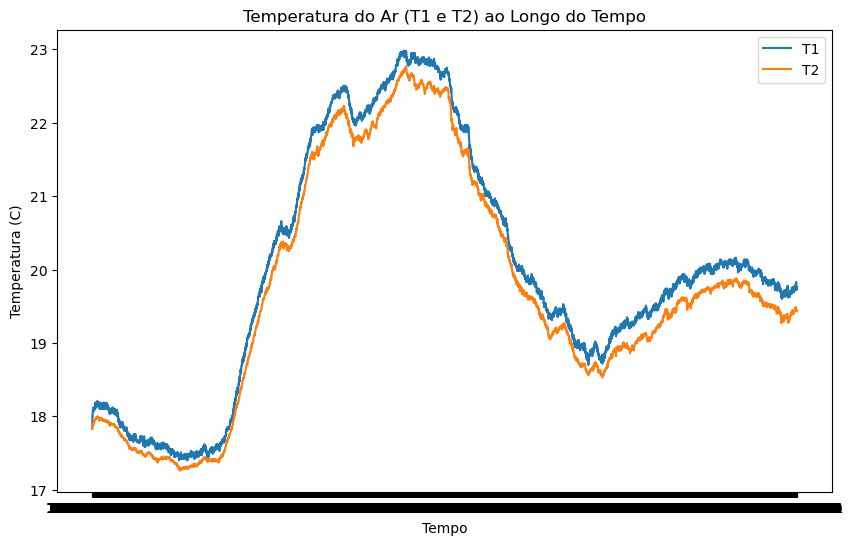

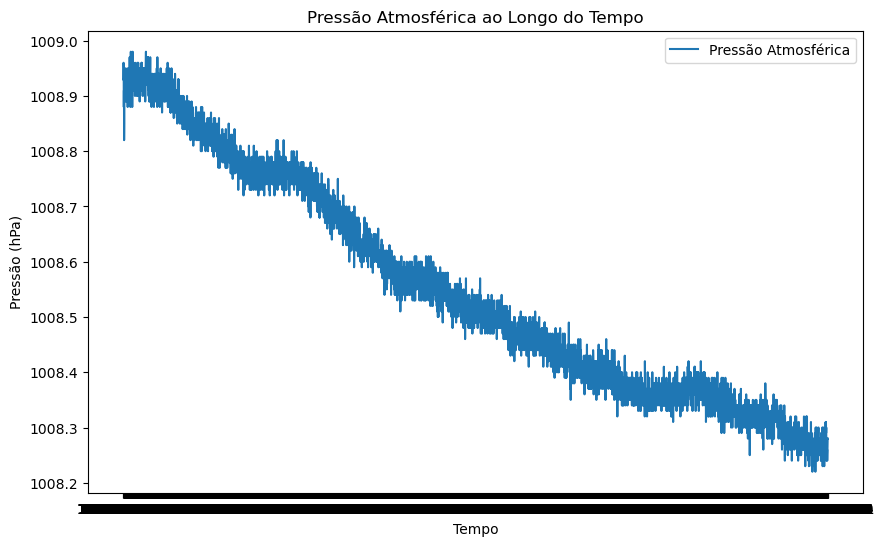

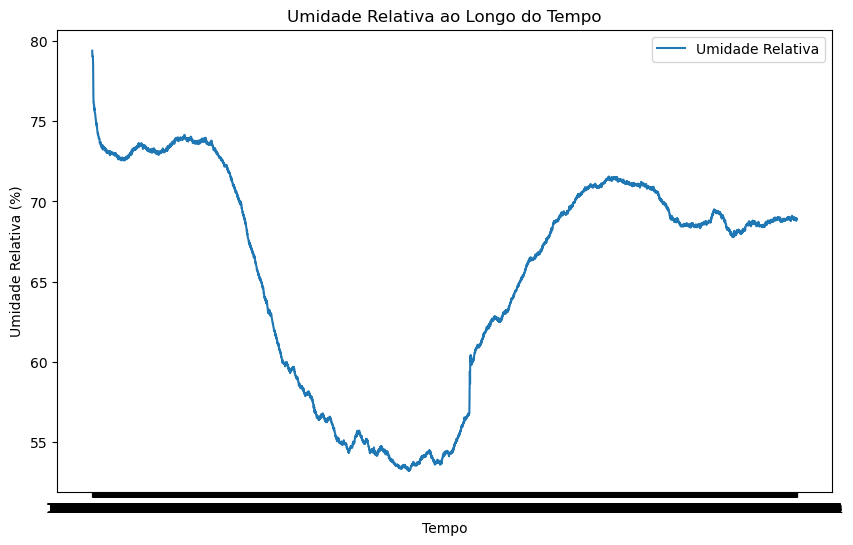

Relatório gerado com sucesso. Consulte o arquivo "report_sensores.txt".


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue os dados do arquivo CSV
df_sensores = pd.read_csv('dados_sensores.csv')

# Remova espaços extras e apóstrofos dos nomes das colunas
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

# Crie o gráfico da Temperatura (T1 e T2)
plt.figure(figsize=(10, 6))
plt.plot(df_sensores['HH:MM:SS.SSS'], df_sensores['T1(C)'], label='T1')
plt.plot(df_sensores['HH:MM:SS.SSS'], df_sensores['T2(C)'], label='T2')
plt.title('Temperatura do Ar (T1 e T2) ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

# Crie o gráfico da Pressão Atmosférica (P)
plt.figure(figsize=(10, 6))
plt.plot(df_sensores['HH:MM:SS.SSS'], df_sensores['P(hPa)'], label='Pressão Atmosférica')
plt.title('Pressão Atmosférica ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Pressão (hPa)')
plt.legend()
plt.show()

# Crie o gráfico da Umidade Relativa (HR)
plt.figure(figsize=(10, 6))
plt.plot(df_sensores['HH:MM:SS.SSS'], df_sensores['HR(%)'], label='Umidade Relativa')
plt.title('Umidade Relativa ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Umidade Relativa (%)')
plt.legend()
plt.show()


# Cálculos estatísticos
media_t1 = df_sensores['T1(C)'].mean()
mediana_t1 = df_sensores['T1(C)'].median()
desvio_padrao_t1 = df_sensores['T1(C)'].std()
max_t1 = df_sensores['T1(C)'].max()
min_t1 = df_sensores['T1(C)'].min()

media_t2 = df_sensores['T2(C)'].mean()
mediana_t2 = df_sensores['T2(C)'].median()
desvio_padrao_t2 = df_sensores['T2(C)'].std()
max_t2 = df_sensores['T2(C)'].max()
min_t2 = df_sensores['T2(C)'].min()

media_p = df_sensores['P(hPa)'].mean()
mediana_p = df_sensores['P(hPa)'].median()
desvio_padrao_p = df_sensores['P(hPa)'].std()
max_p = df_sensores['P(hPa)'].max()
min_p = df_sensores['P(hPa)'].min()

media_hr = df_sensores['HR(%)'].mean()
mediana_hr = df_sensores['HR(%)'].median()
desvio_padrao_hr = df_sensores['HR(%)'].std()
max_hr = df_sensores['HR(%)'].max()
min_hr = df_sensores['HR(%)'].min()

# Informações para o relatório
arduino_modelo = "Arduino Nano 33 BLE Sense"
data_aquisicao_sensores = "21/12/2023"  
versao_codigo_sensores = "Versão 1"  
autor_codigo_sensores = "David Seita Capa"  

# Crie o conteúdo do relatório
report_content_sensores = f"""Relatório de Caracterização dos Dados Adquiridos - Sensores

Modelo do Arduino: {arduino_modelo}
Data da Aquisição: {data_aquisicao_sensores}
Versão do Código: {versao_codigo_sensores}
Autor do Código: {autor_codigo_sensores}

Estatísticas da Temperatura (T1):
  - Média: {media_t1:.2f}
  - Mediana: {mediana_t1:.2f}
  - Desvio Padrão: {desvio_padrao_t1:.2f}
  - Máximo: {max_t1:.2f}
  - Mínimo: {min_t1:.2f}

Estatísticas da Temperatura (T2):
  - Média: {media_t2:.2f}
  - Mediana: {mediana_t2:.2f}
  - Desvio Padrão: {desvio_padrao_t2:.2f}
  - Máximo: {max_t2:.2f}
  - Mínimo: {min_t2:.2f}

Estatísticas da Pressão Atmosférica:
  - Média: {media_p:.2f}
  - Mediana: {mediana_p:.2f}
  - Desvio Padrão: {desvio_padrao_p:.2f}
  - Máximo: {max_p:.2f}
  - Mínimo: {min_p:.2f}

Estatísticas da Umidade Relativa:
  - Média: {media_hr:.2f}
  - Mediana: {mediana_hr:.2f}
  - Desvio Padrão: {desvio_padrao_hr:.2f}
  - Máximo: {max_hr:.2f}
  - Mínimo: {min_hr:.2f}
"""

# Salve o relatório em um arquivo "report_sensores.txt"
with open('report_sensores.txt', 'w') as report_file:
    report_file.write(report_content_sensores)

# Exiba uma mensagem informando que o relatório foi gerado
print('Relatório gerado com sucesso. Consulte o arquivo "report_sensores.txt".')


Gerar gráficos que permitam visualizar potenciais correlações entre as grandezas adquiridas: (T1,
T2), (T1, P), (T1, HR). 

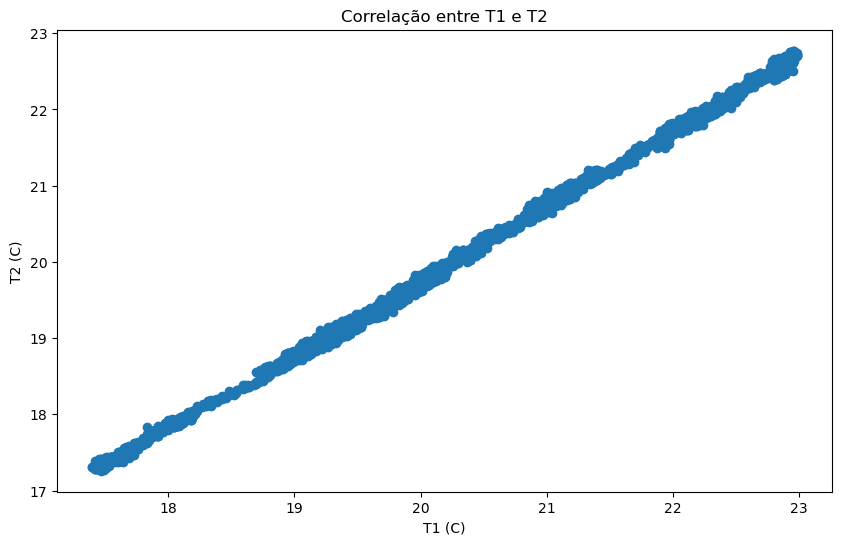

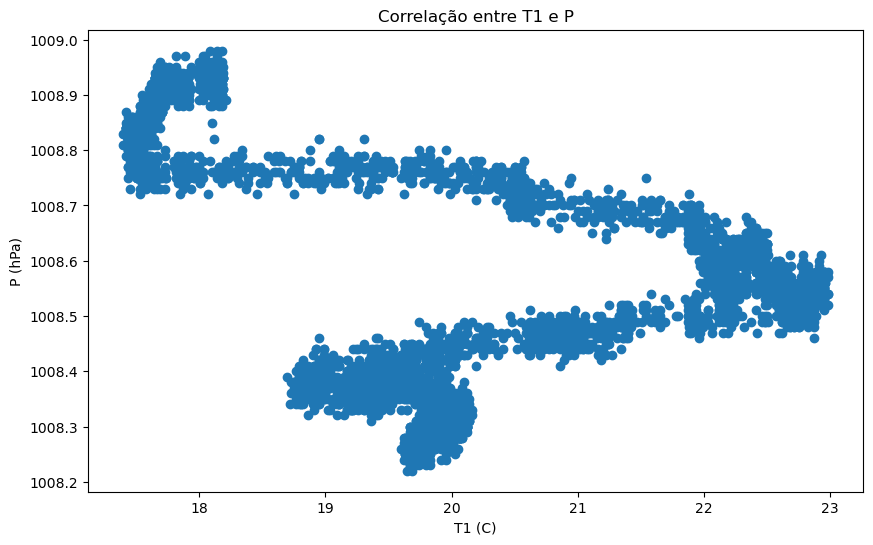

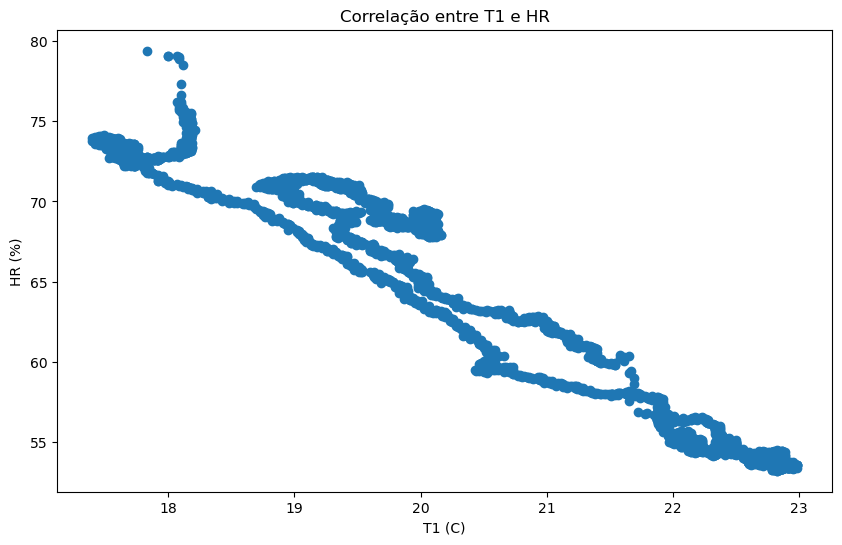

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue os dados do arquivo CSV
df_sensores = pd.read_csv('dados_sensores.csv')

# Remova espaços extras e aspas dos nomes das colunas
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

# Crie o gráfico para a correlação entre T1 e T2
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['T2(C)'])
plt.title('Correlação entre T1 e T2')
plt.xlabel('T1 (C)')
plt.ylabel('T2 (C)')
plt.show()

# Crie o gráfico para a correlação entre T1 e P
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['P(hPa)'])
plt.title('Correlação entre T1 e P')
plt.xlabel('T1 (C)')
plt.ylabel('P (hPa)')
plt.show()

# Crie o gráfico para a correlação entre T1 e HR
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['HR(%)'])
plt.title('Correlação entre T1 e HR')
plt.xlabel('T1 (C)')
plt.ylabel('HR (%)')
plt.show()


In [47]:
import numpy as np

# Carregue os dados do arquivo CSV
df_sensores = pd.read_csv('dados_sensores.csv')

# Remova espaços extras e aspas dos nomes das colunas
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

# Extraia os dados de T1 e T2
dados_T1 = df_sensores['T1(C)']
dados_T2 = df_sensores['T2(C)']

# Calcule o coeficiente de correlação de Pearson
coeficiente_correlacao = np.corrcoef(dados_T1, dados_T2)[0, 1]

# Imprima o coeficiente de correlação
print(f"Coeficiente de correlação de Pearson entre T1 e T2: {coeficiente_correlacao:.2f}")


Coeficiente de correlação de Pearson entre T1 e T2: 1.00
